In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import requests
import time

In [2]:
per_pupil_spend = pd.read_csv('NCES Data - Schools\per_pupil_spend_cleaned.csv')
per_pupil_spend

,Agency Name,City,State,Total_Expenditures_per_Pupil,Total_Current_Expenditures_per_Pupil,Instructional_Expenditures_per_Pupil
0,ADAIR-CASEY COMM SCHOOL DISTRICT,Adair,IA,11698,9249,5862
1,ADEL DESOTO MINBURN COMM SCHOOL DISTRICT,Adel,IA,14954,9776,6152
2,AGWSR COMM SCHOOL DISTRICT,Ackley,IA,16061,8939,5835
3,AHSTW Comm School District,Avoca,IA,12495,9700,6446
4,AKRON WESTFIELD COMM SCHOOL DISTRICT,Akron,IA,12550,11047,7320
5,ALBERT CITY-TRUESDALE COMM SCHOOL DISTRICT,Albert City,IA,13719,8700,5919
6,ALBIA COMM SCHOOL DISTRICT,Albia,IA,10651,9611,6149
7,ALBURNETT COMM SCHOOL DISTRICT,Alburnett,IA,13088,10610,6873
8,ALDEN COMM SCHOOL DISTRICT,Alden,IA,13315,10435,6957
9,ALGONA COMM SCHOOL DISTRICT,Algona,IA,13373,11420,8073


In [3]:
per_pupil_spend['city_state'] = per_pupil_spend['City'] + ', ' + per_pupil_spend['State']

In [4]:
per_pupil_spend.head()

,Agency Name,City,State,Total_Expenditures_per_Pupil,Total_Current_Expenditures_per_Pupil,Instructional_Expenditures_per_Pupil,city_state
0,ADAIR-CASEY COMM SCHOOL DISTRICT,Adair,IA,11698,9249,5862,"Adair, IA"
1,ADEL DESOTO MINBURN COMM SCHOOL DISTRICT,Adel,IA,14954,9776,6152,"Adel, IA"
2,AGWSR COMM SCHOOL DISTRICT,Ackley,IA,16061,8939,5835,"Ackley, IA"
3,AHSTW Comm School District,Avoca,IA,12495,9700,6446,"Avoca, IA"
4,AKRON WESTFIELD COMM SCHOOL DISTRICT,Akron,IA,12550,11047,7320,"Akron, IA"


In [5]:
avg_spend = per_pupil_spend.groupby(['city_state'])['Total_Expenditures_per_Pupil'].mean()

In [6]:
instruct_spend = per_pupil_spend.groupby(['city_state'])['Instructional_Expenditures_per_Pupil'].mean()
instruct_spend_df = instruct_spend.to_frame()

In [7]:
avg_spend_df = avg_spend.to_frame()
avg_spend_df = pd.merge(avg_spend_df, instruct_spend_df, on='city_state')

In [8]:
cities_df = pd.read_csv('cities_df.csv')
cities_df.head()

,Unnamed: 0,CBSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Principal City Name,FIPS State Code,FIPS Place Code,STUSAB,State Name,STATENS,city_state,city_full_state,Miserable City,Happy City
0,0,10100,"Aberdeen, SD",Micropolitan Statistical Area,Aberdeen,46.0,100.0,SD,South Dakota,1785534,"Aberdeen, SD","Aberdeen, South Dakota",False,False
1,1,15100,"Brookings, SD",Micropolitan Statistical Area,Brookings,46.0,7580.0,SD,South Dakota,1785534,"Brookings, SD","Brookings, South Dakota",False,False
2,2,26700,"Huron, SD",Micropolitan Statistical Area,Huron,46.0,31060.0,SD,South Dakota,1785534,"Huron, SD","Huron, South Dakota",False,False
3,3,33580,"Mitchell, SD",Micropolitan Statistical Area,Mitchell,46.0,43100.0,SD,South Dakota,1785534,"Mitchell, SD","Mitchell, South Dakota",False,False
4,4,38180,"Pierre, SD",Micropolitan Statistical Area,Pierre,46.0,49600.0,SD,South Dakota,1785534,"Pierre, SD","Pierre, South Dakota",False,False


In [9]:
avg_spend_merge = pd.merge(avg_spend_df, cities_df, how='left', on='city_state')
avg_spend_merge

,city_state,Total_Expenditures_per_Pupil,Instructional_Expenditures_per_Pupil,Unnamed: 0,CBSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Principal City Name,FIPS State Code,FIPS Place Code,STUSAB,State Name,STATENS,city_full_state,Miserable City,Happy City
0,"ABBOTT, TX",10167.000000,5981.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"ABERDEEN, ID",7907.000000,4050.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ABERDEEN, WA",12207.000000,7255.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABERNATHY, TX",12883.000000,6044.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ABILENE, TX",9091.000000,4805.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"ACCORD, NY",28787.000000,17957.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"ACKERLY, TX",65282.000000,6672.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"ACKERMAN, MS",10747.000000,6044.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"ADA, MN",19449.000000,7994.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"ADAMS, MN",14945.000000,8658.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
spend_df = avg_spend_merge.loc[avg_spend_merge['Happy City'].notnull()]

In [11]:
spend_df.sort_values(by=['Total_Expenditures_per_Pupil'])

,city_state,Total_Expenditures_per_Pupil,Instructional_Expenditures_per_Pupil,Unnamed: 0,CBSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Principal City Name,FIPS State Code,FIPS Place Code,STUSAB,State Name,STATENS,city_full_state,Miserable City,Happy City
6033,"Little Rock, AR",6615.000000,2731.000000,755.0,30780.0,"Little Rock-North Little Rock-Conway, AR",Metropolitan Statistical Area,Little Rock,5.0,41000.0,AR,Arkansas,68085.0,"Little Rock, Arkansas",False,False
9789,"Show Low, AZ",6628.000000,3732.000000,1254.0,43320.0,"Show Low, AZ",Micropolitan Statistical Area,Show Low,4.0,66470.0,AZ,Arizona,1779777.0,"Show Low, Arizona",False,False
9511,"Safford, AZ",6881.000000,3839.000000,1253.0,40940.0,"Safford, AZ",Micropolitan Statistical Area,Safford,4.0,62000.0,AZ,Arizona,1779777.0,"Safford, Arizona",False,False
3626,"Fayetteville, NC",6976.333333,3850.666667,409.0,22180.0,"Fayetteville, NC",Metropolitan Statistical Area,Fayetteville,37.0,22920.0,NC,North Carolina,1027616.0,"Fayetteville, North Carolina",True,False
10124,"Susanville, CA",7180.400000,3827.400000,920.0,45000.0,"Susanville, CA",Micropolitan Statistical Area,Susanville,6.0,77364.0,CA,California,1779778.0,"Susanville, California",False,False
9014,"Rocky Mount, NC",7300.000000,3598.000000,435.0,40580.0,"Rocky Mount, NC",Metropolitan Statistical Area,Rocky Mount,37.0,57500.0,NC,North Carolina,1027616.0,"Rocky Mount, North Carolina",False,False
4815,"High Point, NC",7300.000000,3654.000000,413.0,24660.0,"Greensboro-High Point, NC",Metropolitan Statistical Area,High Point,37.0,31400.0,NC,North Carolina,1027616.0,"High Point, North Carolina",False,False
9800,"Sierra Vista, AZ",7326.666667,3870.333333,1256.0,43420.0,"Sierra Vista-Douglas, AZ",Metropolitan Statistical Area,Sierra Vista,4.0,66820.0,AZ,Arizona,1779777.0,"Sierra Vista, Arizona",False,False
8568,"Prescott, AZ",7327.750000,4304.875000,1251.0,39150.0,"Prescott Valley-Prescott, AZ",Metropolitan Statistical Area,Prescott,4.0,57380.0,AZ,Arizona,1779777.0,"Prescott, Arizona",False,False
11616,"Yuma, AZ",7466.000000,3466.125000,1258.0,49740.0,"Yuma, AZ",Metropolitan Statistical Area,Yuma,4.0,85540.0,AZ,Arizona,1779777.0,"Yuma, Arizona",False,False


Text(0.5,1,'Public School Expenditures per Pupil')

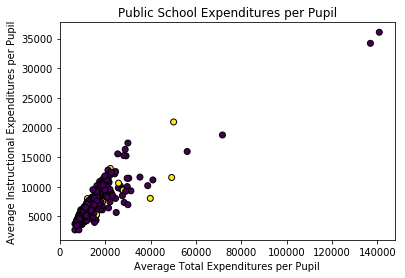

In [12]:
type_mapping = {'True':'gold', 'False':'skyblue'}
plt.scatter(spend_df['Total_Expenditures_per_Pupil'], spend_df['Instructional_Expenditures_per_Pupil'], c=spend_df['Happy City'], linewidth=1, edgecolors='black')

plt.xlabel('Average Total Expenditures per Pupil')
plt.ylabel('Average Instructional Expenditures per Pupil')
plt.title('Public School Expenditures per Pupil')

In [13]:
full_spend_df = pd.merge(per_pupil_spend, cities_df, on='city_state')
full_spend_df.head()

,Agency Name,City,State,Total_Expenditures_per_Pupil,Total_Current_Expenditures_per_Pupil,Instructional_Expenditures_per_Pupil,city_state,Unnamed: 0,CBSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Principal City Name,FIPS State Code,FIPS Place Code,STUSAB,State Name,STATENS,city_full_state,Miserable City,Happy City
0,AMES COMM SCHOOL DISTRICT,Ames,IA,18690,11034,7649,"Ames, IA",567,11180,"Ames, IA",Metropolitan Statistical Area,Ames,19.0,1855.0,IA,Iowa,1779785,"Ames, Iowa",False,False
1,BURLINGTON COMM SCHOOL DISTRICT,Burlington,IA,11110,9468,6114,"Burlington, IA",568,15460,"Burlington, IA-IL",Micropolitan Statistical Area,Burlington,19.0,9550.0,IA,Iowa,1779785,"Burlington, Iowa",False,False
2,CARROLL COMM SCHOOL DISTRICT,Carroll,IA,11163,9434,6289,"Carroll, IA",569,16140,"Carroll, IA",Micropolitan Statistical Area,Carroll,19.0,11080.0,IA,Iowa,1779785,"Carroll, Iowa",False,False
3,CEDAR FALLS COMM SCHOOL DISTRICT,Cedar Falls,IA,11762,10290,6955,"Cedar Falls, IA",592,47940,"Waterloo-Cedar Falls, IA",Metropolitan Statistical Area,Cedar Falls,19.0,11755.0,IA,Iowa,1779785,"Cedar Falls, Iowa",False,False
4,CEDAR RAPIDS COMM SCHOOL DISTRICT,Cedar Rapids,IA,13238,10826,6638,"Cedar Rapids, IA",570,16300,"Cedar Rapids, IA",Metropolitan Statistical Area,Cedar Rapids,19.0,12000.0,IA,Iowa,1779785,"Cedar Rapids, Iowa",False,False


In [14]:
avg_happy_spend = full_spend_df.groupby(['Happy City'])['Total_Expenditures_per_Pupil'].mean()
avg_happy_spend_df = avg_happy_spend.to_frame()
avg_happy_spend_df

,Total_Expenditures_per_Pupil
Happy City,
False,13255.375236
True,23249.583333


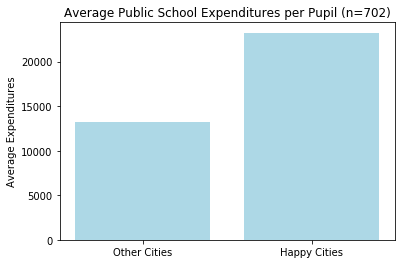

In [25]:
x_axis = ['Other Cities', 'Happy Cities']
plt.bar(x_axis, avg_happy_spend_df['Total_Expenditures_per_Pupil'], color='lightblue')

plt.title("Average Public School Expenditures per Pupil (n=702)")
plt.ylabel("Average Expenditures")
plt.savefig('school_spending.png')